# Paired Sample T-test Notebook

Load libraries

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as statsmodelsweightstats
%matplotlib inline

from collections import Counter

Load data

I will be using a sample dataset.

In [84]:
data = pd.read_excel("student_t_test/data/t-test2.xls", sheet_name ="Paired-sample t-test")
data.head()

,Morning,Evening
0,13.2,14.0
1,8.2,8.8
2,10.9,11.2
3,14.3,14.2
4,10.7,11.8


In [85]:
data[['Morning','Evening']].describe()

,Morning,Evening
count,10.000000,10.000000
mean,10.630000,11.040000
std,2.451326,2.518465
min,6.600000,6.400000
25%,8.975000,9.425000
50%,10.750000,11.250000
75%,12.625000,13.150000
max,14.300000,14.200000


# Important Variables
So, we have performance of kids in the morning and evening on a certain game.

# Question
Is there a statistically significant difference between the morning and evening performance?

# hypothesis 
H0: There's no difference between morning and evening performance  
Ha: There's a statistically significant difference between morning and evening performance

# The alpha level will be 0.05.
alpha = 0.05

# Assumptions
Determine if data meets requirements to perform an dependent samples t-test.


Assumption #1: Your dependent variables should be measured on a continuous scale.      
Assumption #2: You should have dependence of observations.    
Assumption #3: There should be no significant outliers.    
Assumption #4: Your dependent variables should be approximately normally distributed.    
Assumption #5: There needs to be homogeneity of variances.

# Check missing values

In [86]:
#Lets Look At Missing Data
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data.loc[missing_data['Total Missing'] > 0].head(33)

,Total Missing,%


# Create difference Variable

In [87]:
data['bp_difference'] = data['Morning'] - data['Evening']

Okay, we don't have missing values

# Check and Remove significant outliers

In [88]:
def detect_outliers(df, n, features):
        """
        Takes a dataframe df of features and returns a list of the indices
        corresponding to the observations containing more than n outliers according
        to the Tukey method.
        """
        outlier_indices = []

        # iterate over features(columns)
        for col in features:
            # 1st quartile (25%)
            Q1 = np.percentile(df[col], 25)
            # 3rd quartile (75%)
            Q3 = np.percentile(df[col],75)
            # Interquartile range (IQR)
            IQR = Q3 - Q1

            # outlier step
            outlier_step = 1.5 * IQR

            # Determine a list of indices of outliers for feature col
            outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

            # append the found outlier indices for col to the list of outlier indices
            outlier_indices.extend(outlier_list_col)

        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

        return multiple_outliers

In [89]:
#Checking outliers in Morning performance
detect_outliers(data, 0, ['Morning'])

[]

In [90]:
#Checking outliers in Evening performance
detect_outliers(data, 0, ['Evening'])

[]

Again we have significant outliers. Lets check that with boxplot

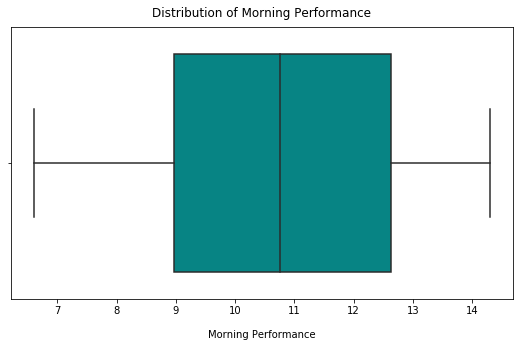

In [91]:
plt.figure(figsize=(9, 5))
sns.boxplot(data['Morning'], color='darkcyan', saturation=0.9)
plt.title("Distribution of Morning Performance", y=1.015)
plt.xlabel("Morning Performance", labelpad=14);

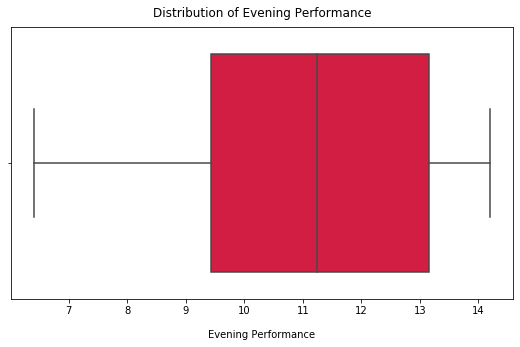

In [92]:
plt.figure(figsize=(9, 5))
sns.boxplot(data['Evening'], color='crimson', saturation=0.9)
plt.title("Distribution of Evening Performance", y=1.015)
plt.xlabel("Evening Performance", labelpad=14);

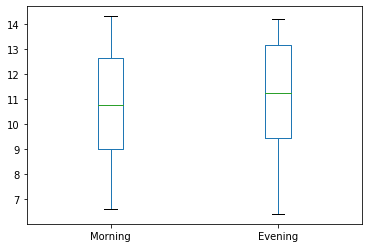

In [93]:
data[['Morning', 'Evening']].plot(kind='box')

# Normality Law


Visualize distribution to check normality

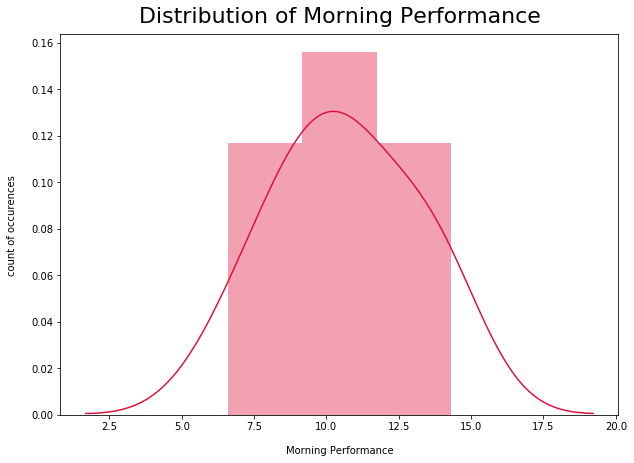

In [94]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Morning'], color='crimson')
plt.title("Distribution of Morning Performance", y=1.015, fontsize=22)
plt.xlabel("Morning Performance", labelpad=14)
plt.ylabel("count of occurences", labelpad=14);

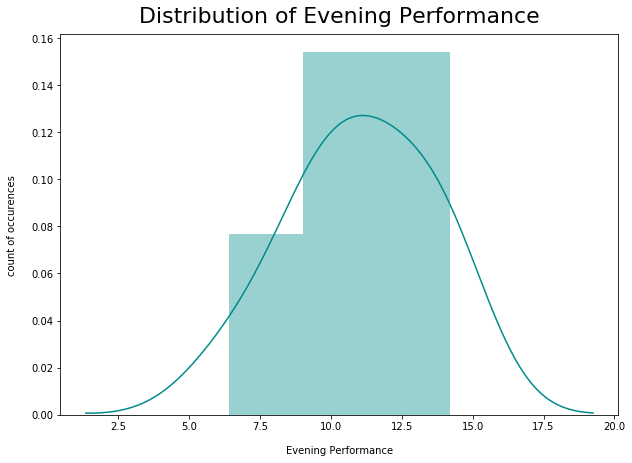

In [95]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Evening'], color='darkcyan')
plt.title("Distribution of Evening Performance", y=1.015, fontsize=22)
plt.xlabel("Evening Performance", labelpad=14)
plt.ylabel("count of occurences", labelpad=14);

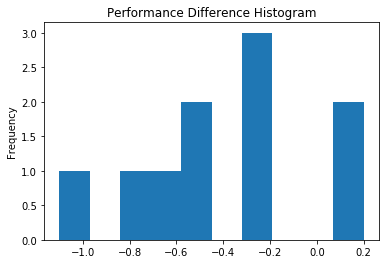

In [96]:
data['bp_difference'].plot(kind='hist', title= 'Performance Difference Histogram')

The histogram of our data seems to be normally distributed. Another way to check for normally distributed data is to use a Q-Q plot

Text(0.5, 1.0, 'Performance Difference Q-Q Plot')

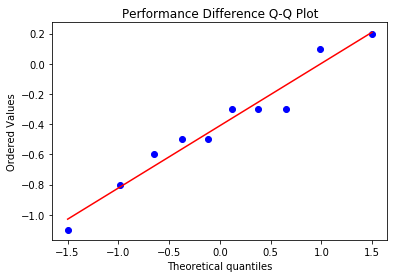

In [97]:
stats.probplot(data['bp_difference'], plot= plt)
plt.title('Performance Difference Q-Q Plot')

There is some deviation from normality, but it does not appear to be severe so there is no need to worry. To be sure, let’s test this statistically to see if the data is normally distributed. To test this, one can use the Shapiro-Wilk test for normality

In [98]:
# Shapiro-Wilk normality test for Morning Performance
stats.shapiro(data.bp_difference.dropna())

(0.9613240361213684, 0.8008588552474976)

Shapiro-Wilk test for normality was not significant which indicates that the difference between the two performances is normally distibuted.

# Variance

In [99]:
stats.levene(data.Morning, data.Evening)

LeveneResult(statistic=0.01126580661642599, pvalue=0.9166448330605479)

Levene’s test for homogeneity of variance is not significant which indicates that the performances have approximately equal variances.

# Paired Samples T-Test

In [100]:
t, p = stats.ttest_rel(data.Morning, data.Evening)
print('T statistic : {}'.format(t))
print('P value : {}'.format(p))

T statistic : -3.348876536221576
P value : 0.00853878071759894


# Interpretation


A paired sample t-test was used to analyze the performance of kids in the morning and evening to test if the there was a significant difference. The Performance in the evening was higher (11.04 ± 2.52 units) compared to the morning performance (10.63 ± 2.45 units); there was a statistically significant improvement in performance (t(9)=-3.35, p= 0.0085) of 0.41 units.

Is it tough to determine if this value of 0.41 is considered small or large?. The standard deviations are 2.45 and 2.52 so I think this difference in means of 0.41 at a glance seems relatively large. To combat this uncertainty of the calculation above, we can use the measure of Cohen's d

# Cohen's d
Cohen's d is a measure to determine the standardized mean difference in groups. The measure is the difference in group means in terms of standard deviation units.

In [101]:
morning_mean = np.mean(data.Morning)
evening_mean = np.mean(data.Evening)
morning_standard_deviation = np.std(data.Morning)
evening_standard_deviation = np.std(data.Evening)

In [102]:
def interpret_cohens_d(cohens_d):
    """
    Determines text interpretation of effect size given Cohen's d value

    :param cohens_d: float of Cohen's d value
    :returns: effect_size_interpretation: adjective to describe magnitude of effect size
    """
    if 0<=cohens_d<0.1:
        effect_size_interpretation = "Very Small"
    elif 0.1<=cohens_d<0.35:
        effect_size_interpretation = "Small"
    elif 0.35<=cohens_d<0.65:
        effect_size_interpretation = "Medium"
    elif 0.65<=cohens_d<0.9:
        effect_size_interpretation = "Large"
    elif cohens_d >= 0.9:
        effect_size_interpretation = "Very Large"
    return effect_size_interpretation

In [103]:
def two_sample_data_setup_for_cohens_d(mean_1, mean_2, sample_std_dev_1, sample_std_dev_2):
    """
    Creates two normal distributions of data values. 
    Calculates differences in values and standard deviation of list of differences.
    Calculates Cohen's D - equation used in dependent t-tests

    :param mean_1: mean of group one
    :param mean_2: mean of group two
    :param sample_std_dev_1: sample standard deviation of group one
    :param sample_std_dev_2: sample standard deviation of group two
    
    :returns: values_1, values_2, cohens_d: values for group one, values for group two, Cohen's d
    """
    values_1 = np.random.normal(loc=mean_1, scale=sample_std_dev_1, size=3000)
    values_2 = np.random.normal(loc=mean_2, scale=sample_std_dev_2, size=3000)
    differences_group_values = np.subtract(values_1, values_2)
    std_dev_differences_group_values = np.std(differences_group_values, ddof=1)
    cohens_d = round(abs((mean_1 - mean_2)/std_dev_differences_group_values), 2)
    return values_1, values_2, cohens_d

In [104]:
def visualize_distributions(values_1, values_2, cohens_d, cohens_d_interpretation):
    """
    Plots KDE plots of values from values_1 and values_2.
    Inserts Cohen's d value and interpretation in title

    :param values_1: values in group one
    :param values_2: values in group two 
    :param cohens_d: Cohen's d value
    :param cohens_d_interpretation: text to describe magnitude of effect size
    :returns: plot figure
    """
    plt.figure(figsize=(10, 8))
    sns.distplot(values_1, hist=False)
    sns.distplot(values_2, hist=False)
    plt.xlabel("value", labelpad=13)
    plt.ylabel("frequency", labelpad=13)
    plt.title("Distribution of Two Groups with {0} Cohen's d of {1}".format(cohens_d_interpretation, cohens_d), y=1.015, fontsize=22);

In [105]:
two_groups_close_means_small_std_dev = two_sample_data_setup_for_cohens_d(morning_mean, evening_mean, morning_standard_deviation, evening_standard_deviation)
values_1 = two_groups_close_means_small_std_dev[0]
values_2 = two_groups_close_means_small_std_dev[1]
cohens_d = two_groups_close_means_small_std_dev[2]
cohens_d_interpretation = interpret_cohens_d(cohens_d)

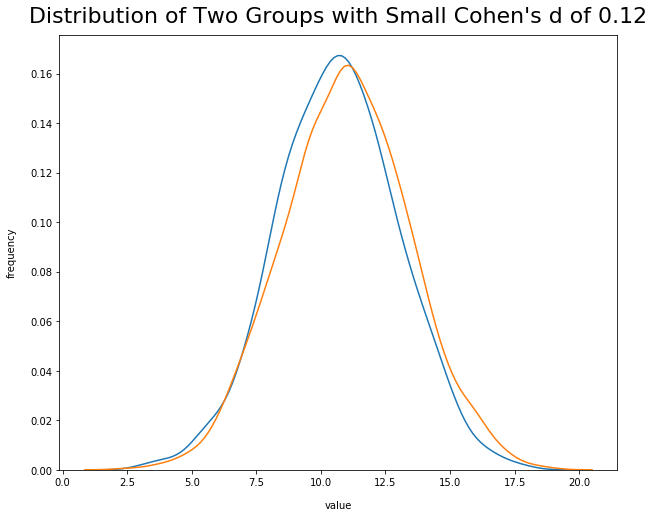

In [106]:
visualize_distributions(values_1, values_2, cohens_d, cohens_d_interpretation)

There's a 0.12 difference in means in terms of sample standard deviation units. The larger the Cohen's d value, the further sample means are from one another in standard deviation units.

In [107]:
print('The Effect size is '+str(interpret_cohens_d(0.12)))

The Effect size is Small


As seen above, the small Cohen's d value of 0.12 means that the sample means are close to one another in standard deviation units. In this test the difference is statistically significant